# Understanding Supervised Regression Models

Use supervised regression techniques to **predict daily bicycle rentals for a bike-sharing service**. **Using historical data, we train and evaluate multiple regression models to forecast rental counts based on features such as weather, season, and weekday**. 

## Regression

_Supervised_ machine learning techniques involve training a model to operate on a set of _features_ and predict a _label_ using a dataset that includes some already-known label values. The training process _fits_ the features to the known labels to define a general function that can be applied to new features for which the labels are unknown, and predict them. You can think of this function like this, in which **_y_** represents the label we want to predict and **_x_** represents the features the model uses to predict it.

$$y = f(x)$$

In most cases, _x_ is actually a _vector_ that consists of multiple feature values, so to be a little more precise, the function could be expressed like this:

$$y = f([x_1, x_2, x_3, ...])$$

The goal of training the model is to find a function that performs some kind of calculation to the _x_ values that produces the result _y_. We do this by applying a machine learning _algorithm_ that tries to fit the _x_ values to a calculation that produces _y_ reasonably accurately for all of the cases in the training dataset.

There are lots of machine learning algorithms for supervised learning, and they can be broadly divided into two types:

**_Regression_ algorithms**: Algorithms that predict a _y_ value that is a numeric value, such as the price of a house or the number of sales transactions.

**_Classification_ algorithms**: Algorithms that predict to which category, or _class_, an observation belongs. The _y_ value in a classification model is a vector of probability values between 0 and 1, one for each class, indicating the probability of the observation belonging to each class.

In this notebook, we'll focus on _regression_, using an example based on a real study in which data for a bicycle sharing scheme was collected and used to predict the number of rentals based on seasonality and weather conditions. We'll use a simplified version of the dataset from that study.

**Citation**: The data used in this exercise is derived from [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) and is used in accordance with the published [license agreement](https://www.capitalbikeshare.com/data-license-agreement).


# Explore the Data

Goal: try to understand relationships between its attributes

Apparent relationship between _features_ and the _label_ (target) your model try to predict

- Detect and fix issues in the data (missing values, errors or outlier values)
- Derive new features columns by transforming or combining existing features (feature engineering)
- Normalizing numeric features
- Encoding categorical features

In [1]:
# Load the data
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('./../../data/daily-bike-share.csv')

# Display the first few rows of the data
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82



The data consists of the following columns:

**instant**: A unique row identifier

**dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.

**season**: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)

**yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)

**mnth**: The calendar month in which the observation was made (1:January ... 12:December)

**holiday**: A binary value indicating whether or not the observation was made on a public holiday)

**weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)

**workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)

**weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)

**temp**: The temperature in celsius (normalized)

**atemp**: The apparent ("feels-like") temperature in celsius (normalized)

**hum**: The humidity level (normalized)

**windspeed**: The windspeed (normalized)

**rentals**: The number of bicycle rentals recorded.

In this dataset, **rentals** represents the label (the _y_ value) our model must be trained to predict. The other columns are potential features (_x_ values).


In [3]:
# Add a column called "day" to the dataframe
bike_data['day'] = pd.to_datetime(bike_data['dteday']).dt.day

# Display the first few rows of the updated dataframe
bike_data.head(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8


In [4]:
# Examine the key descriptive statistics for numeric features
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


# Plot the data

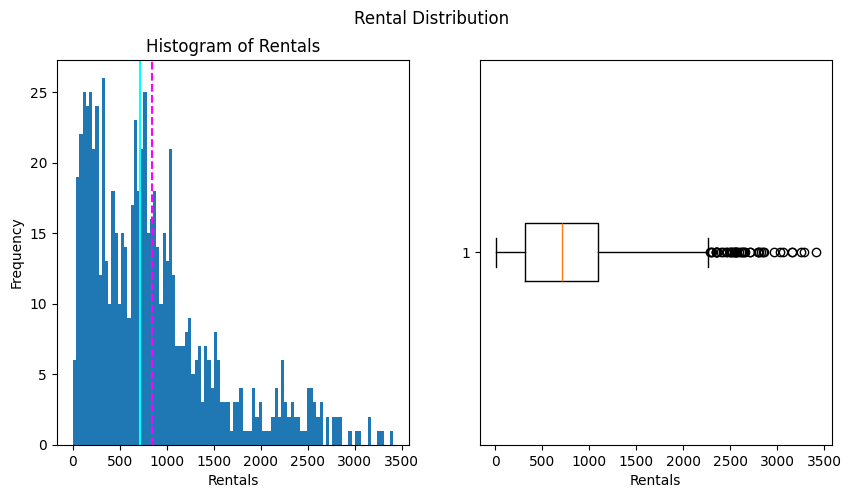

In [ ]:
# Plot histogram and box plot for rentals i.e label
import matplotlib.pyplot as plt

%matplotlib inline

# Get the label column
label = bike_data['rentals']

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Plot the histogram of the label
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Rentals')
ax[0].set_title('Histogram of Rentals')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='--')
ax[0].axvline(label.median(), color='cyan', linestyle='-')

# Plot the box plot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

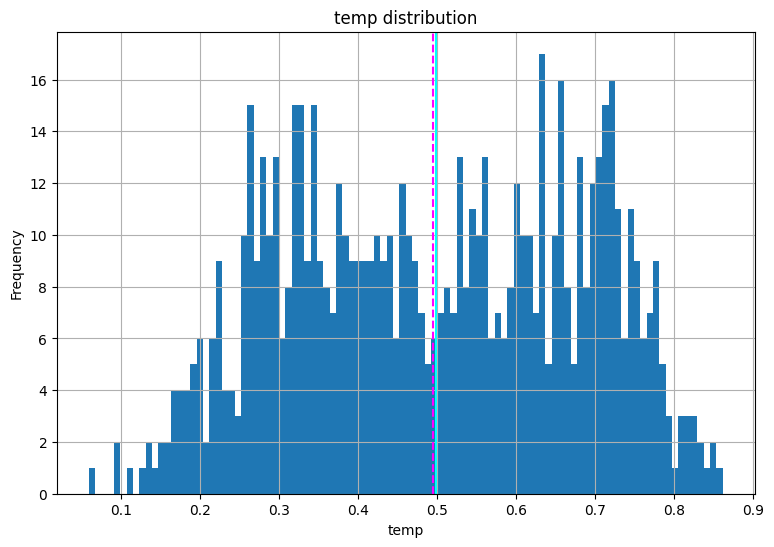

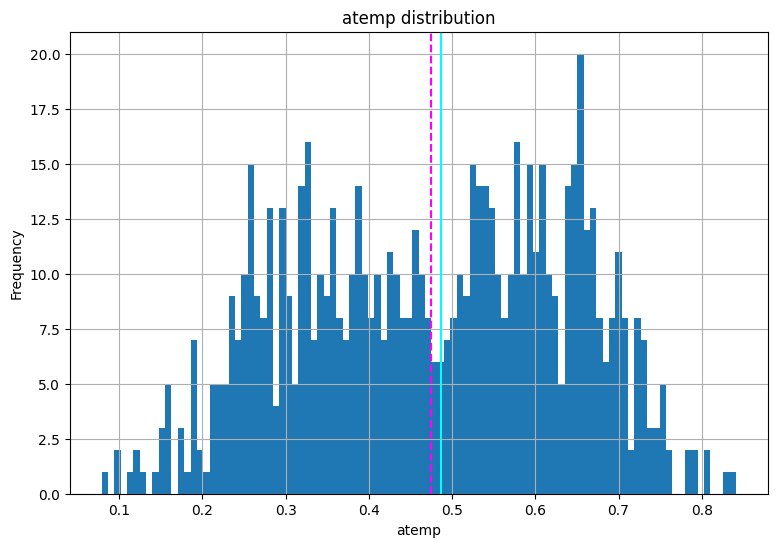

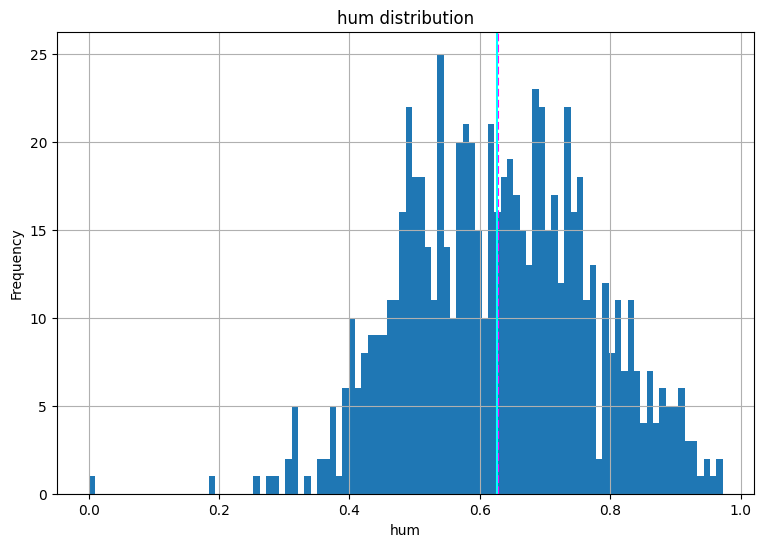

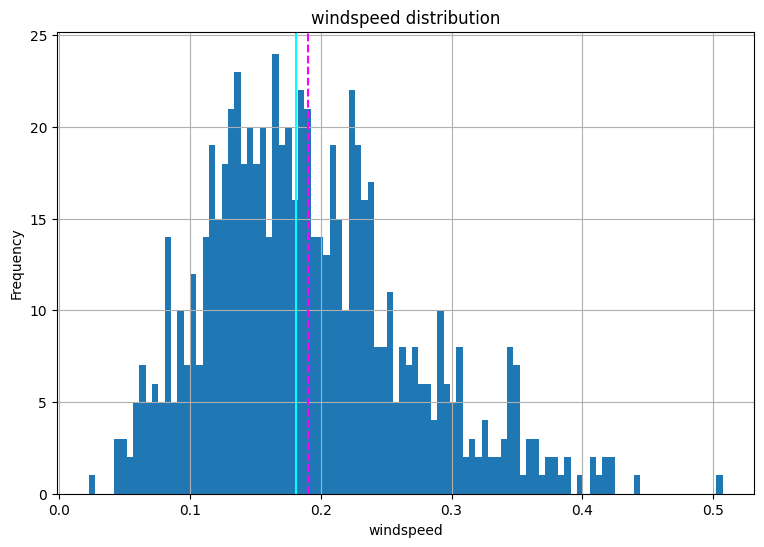

In [9]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='--')
    ax.axvline(feature.median(), color='cyan', linestyle='-')
    ax.set_title(f'{col} distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)
    fig.show()

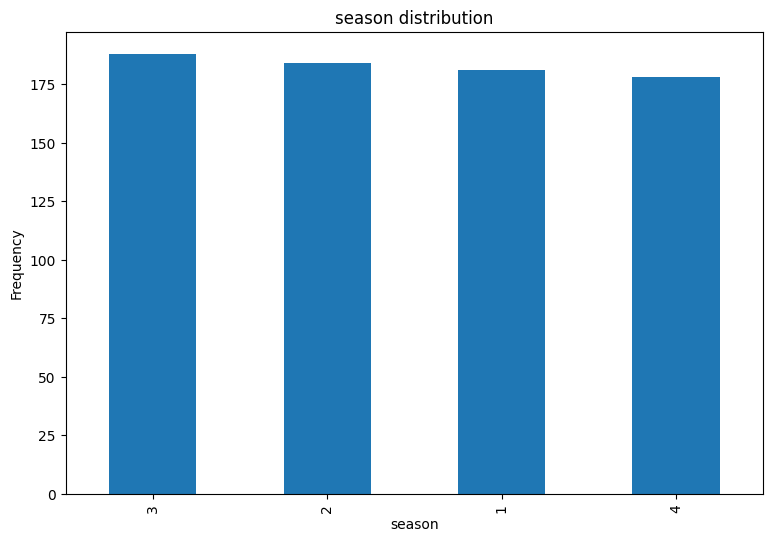

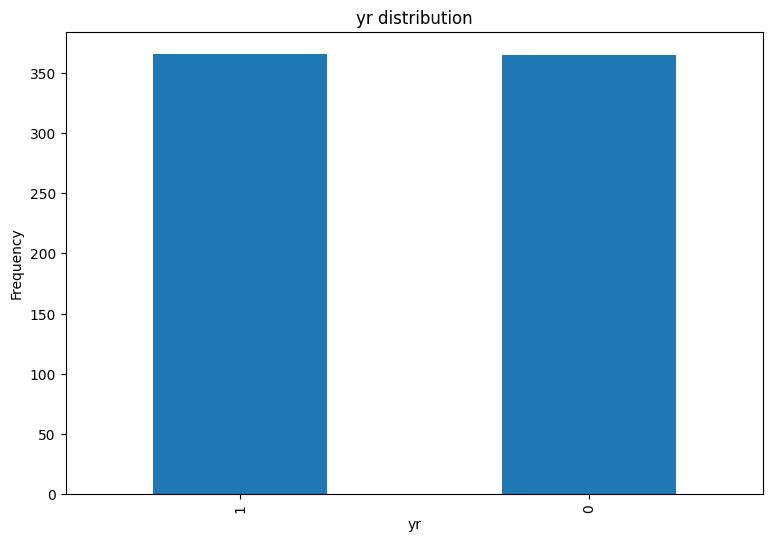

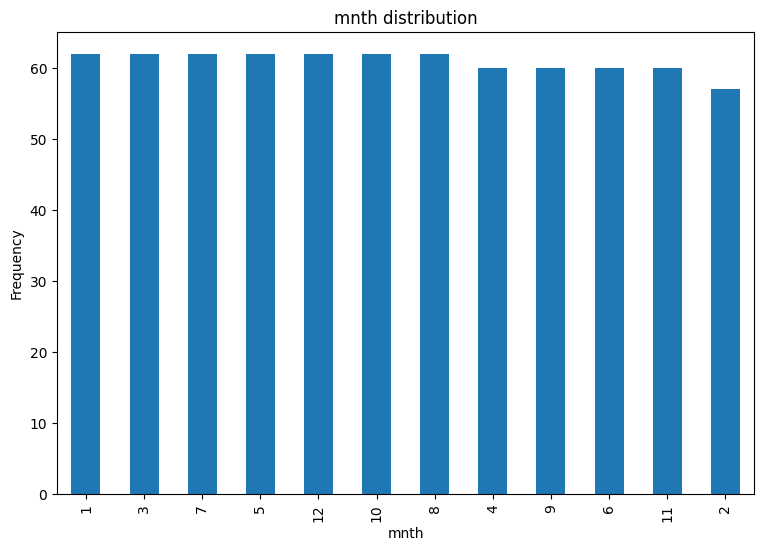

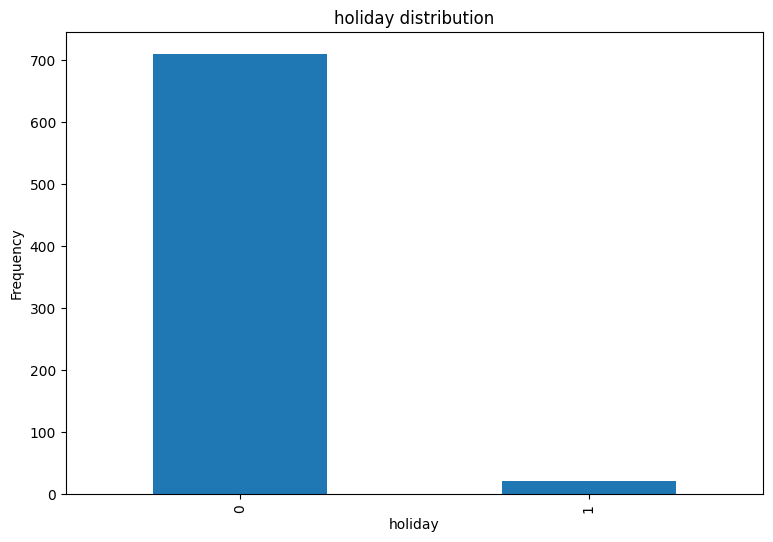

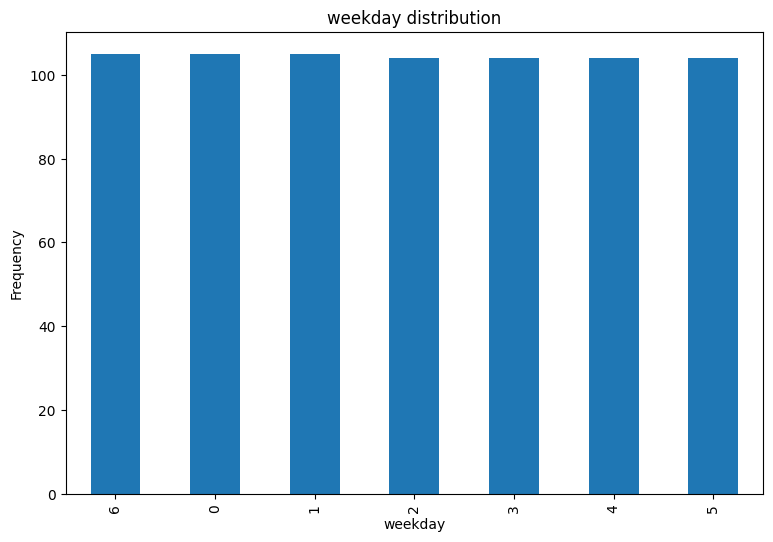

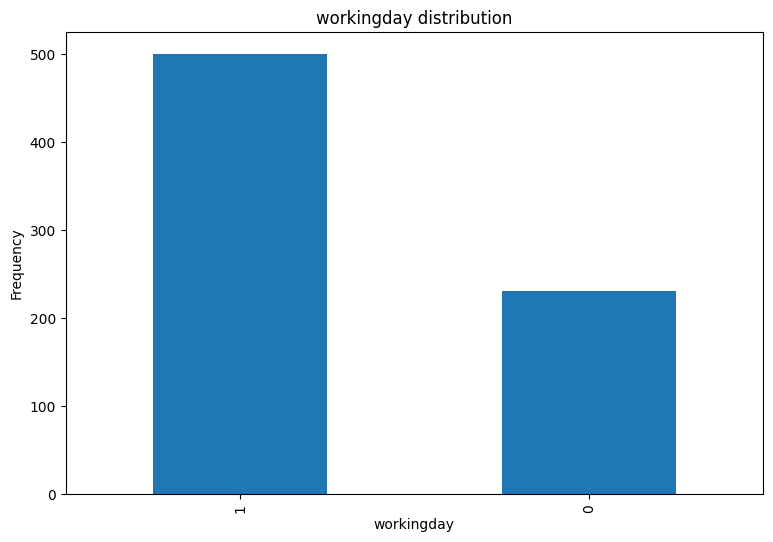

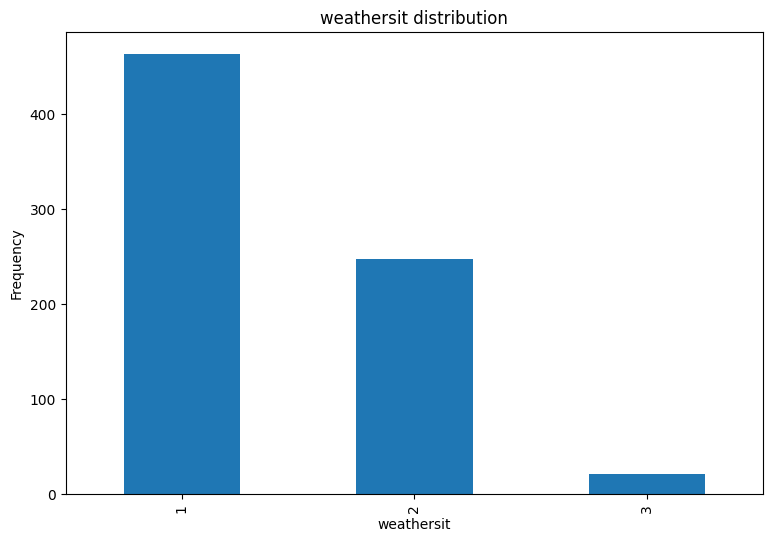

In [10]:
# Plot the categorical features

# ploat a bar plot for each categorical feature
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} distribution')
    ax.set_ylabel('Frequency')




Many of the categorical features show a more or less _uniform_ distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

**holiday**: There are many fewer days that are holidays than days that aren't.

**workingday**: There are more working days than non-working days.

**weathersit**: Most days are category _1_ (clear), with category _2_ (mist and cloud) the next most common. There are comparatively few category _3_ (light rain or snow) days, and no category _4_ (heavy rain, hail, or fog) days at all.
